In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.model_selection import train_test_split



In [11]:
#step 1: Generate Toy(Dummy) Datasset
X,y= make_blobs(n_samples=2000, n_features=2, cluster_std=3,centers=2, random_state=42)
print(X.shape, y.shape)
n_features=2


(2000, 2) (2000,)


In [12]:
#step-2 visualize dataSet
sns.set()
def visualise(X,y):
    plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis")
    plt.show()

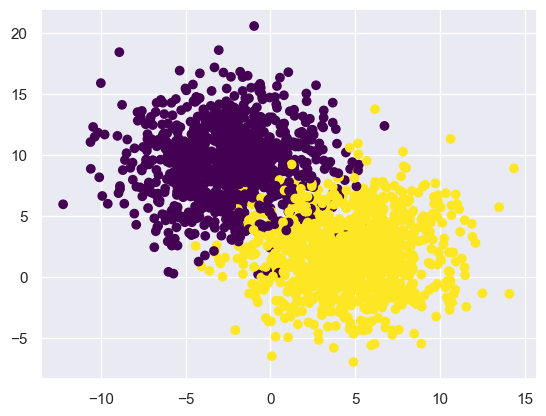

In [13]:
visualise(X,y)

In [14]:
X.mean()

3.335296810117377

In [15]:
#step 3: to normalize data:
def normalize(X):
    u=X.mean(axis=0)
    std=X.std(axis=0)
    
    return (X-u)/std

In [16]:
normalize(X)

array([[-1.43211741,  0.65078613],
       [-0.47100516,  0.87372191],
       [-0.40182883,  2.1275269 ],
       ...,
       [ 1.96970601, -0.24632291],
       [-0.80805197, -0.01411826],
       [ 0.83964924,  0.53655099]])

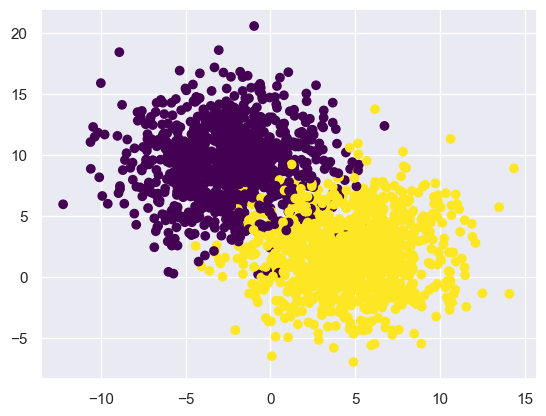

In [17]:
visualise(X,y)

In [18]:
XT, Xt,yT,yt= train_test_split(X,y, test_size=0.25, shuffle= False, random_state=0);

In [19]:
print(XT.shape, yT.shape)
print(Xt.shape, yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


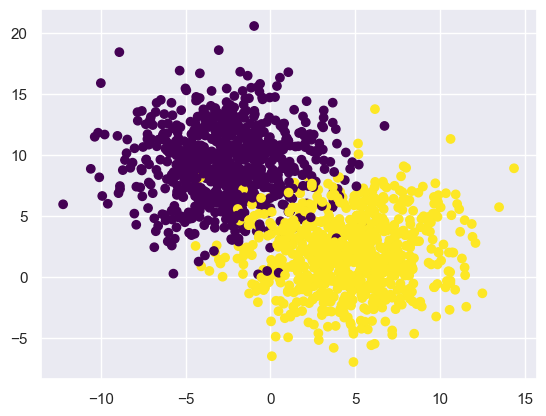

In [20]:
visualise(XT,yT)

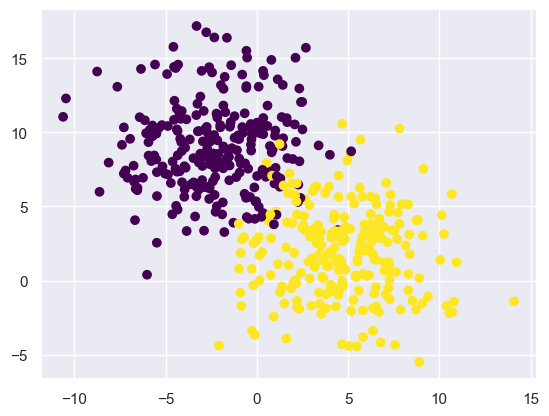

In [21]:
visualise(Xt, yt)

In [22]:
# Model 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

# Binary Cross Entropy 
def error(y,yp):
    loss = -np.mean(y*np.log(yp) + (1-y)*np.log(1-yp))
    return loss 

def gradient(X,y,yp):
    m = X.shape[0]
    grad = -(1/m)*np.dot(X.T, (y-yp))
    return grad 

def train(X,y,max_iters=100,learning_rate=0.1):
    
    # Randomly init theta 
    theta = np.random.randn(n_features + 1,1)

    error_list = []

    for i in range(max_iters):
        yp = hypothesis(X,theta)
        e = error(y,yp)
        error_list.append(e)
        grad = gradient(X,y,yp)
        theta = theta - learning_rate*grad 

    plt.plot(error_list)
    return theta 

def predict(X,theta):
    h = hypothesis(X,theta)
    preds = np.zeros((X.shape[0],1),dtype='int')
    preds[h >= 0.5] = 1

    return preds 

def accuracy(X,y,theta):
    preds = predict(X,theta)
    return ((y==preds).sum())/y.shape[0]*100

In [24]:
def addExtraColumn(X):
    if X.shape[1] ==n_features:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones,X))

    return X 
     

In [25]:
XT = addExtraColumn(XT)
print(XT)

[[ 1.         -5.47801208  8.63692537]
 [ 1.         -1.06616993  9.6859382 ]
 [ 1.         -0.74862634 15.58565301]
 ...
 [ 1.          1.20565159  9.07810086]
 [ 1.         -0.55372507  6.45798437]
 [ 1.          6.11593538  0.39506516]]


In [26]:
Xt = addExtraColumn(Xt)
print(Xt)

[[ 1.         -4.31431746 14.57112068]
 [ 1.          4.32958516 -1.74398842]
 [ 1.          2.88908086  5.08830624]
 ...
 [ 1.         10.13754997  4.41562497]
 [ 1.         -2.61333293  5.50825202]
 [ 1.          4.95019322  8.0993978 ]]


In [27]:
yT = yT.reshape(-1,1)
yt = yt.reshape(-1,1)
     

In [28]:
print(yT.shape)
print(yt.shape)
     
    

(1500, 1)
(500, 1)


C:\Users\ST FAM 4F\AppData\Local\Temp\ipykernel_1384\4046805074.py:10: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*np.log(yp) + (1-y)*np.log(1-yp))


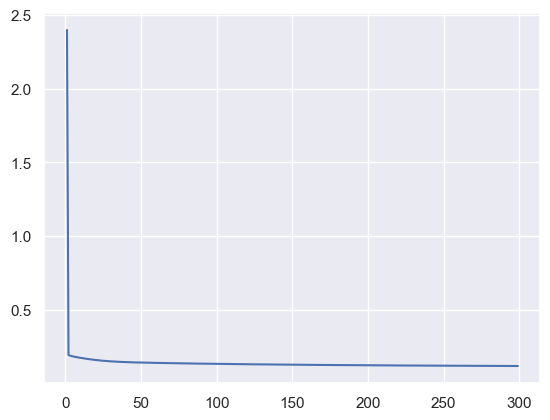

In [29]:
theta = train(XT,yT,max_iters=300,learning_rate=0.3)

In [30]:
theta

array([[ 2.43488317],
       [ 0.70583816],
       [-0.60906406]])

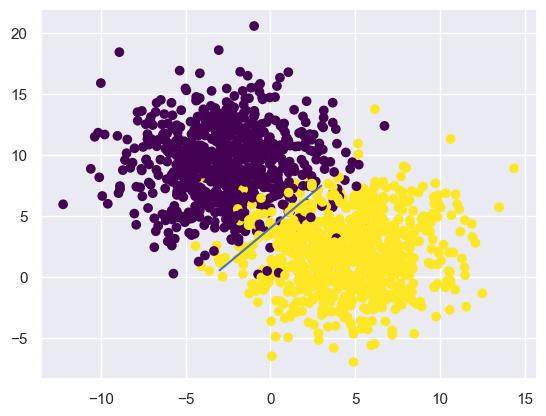

In [31]:
# Decision Boundary Visualisation
plt.scatter(XT[:,1],XT[:,2],c=yT,cmap="viridis")

x1 = np.linspace(-3,3,6)
x2 = -(theta[0][0] + theta[1][0]*x1)/theta[2][0]
plt.plot(x1,x2)
plt.show()
     

In [32]:
# Predictions 
preds = predict(Xt,theta)

In [33]:

# Train Accuracy
accuracy(XT,yT,theta)

95.19999999999999

In [34]:

# Test Accuracy 
accuracy(Xt,yt,theta)

96.6

In [1]:
1#----------  sklearn Library-------

1

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
#create
X,y= make_blobs(n_samples=2000, n_features=2, cluster_std=3,centers=2, random_state=42)
model= LogisticRegression()

In [4]:
#Training
model.fit(X,y)

LogisticRegression()

In [5]:
#predictions
model.predict(X)

array([0, 0, 0, ..., 1, 0, 1])

In [6]:
model.score(X, y)

0.96

In [7]:
# Multiclass classification

In [11]:
X,y= make_blobs(n_samples=2000, n_features=2, cluster_std=3,centers=3, random_state=42)
model= LogisticRegression()

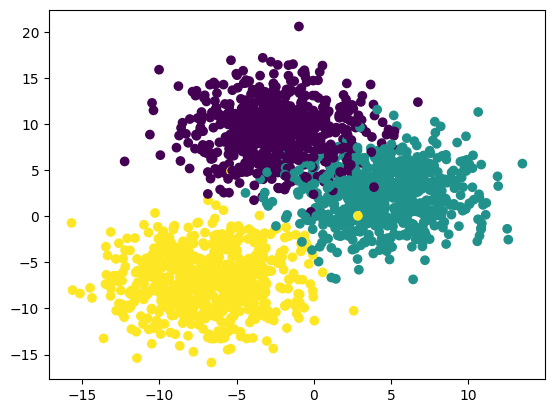

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [16]:
model=LogisticRegression(multi_class='ovr')

In [17]:
model.fit(X,y)

LogisticRegression(multi_class='ovr')

In [18]:
model.predict(X)

array([1, 1, 1, ..., 1, 2, 1])

In [21]:
model.score(X,y)

0.9605